<a href="https://colab.research.google.com/github/Khamdanfakhryza/Artificial-Neural-Network/blob/main/Predictive_Analysis_of_Carbon_Materials_for_Battery_Performance_Optimization_A_Comparative_Study_Using_Machine_Learning_Approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set seed for reproducibility
np.random.seed(42)

In [ ]:
import gdown

def download_and_read_csv_from_drive(drive_file_url):
    try:
        # Ekstrak ID file dari URL Google Drive
        file_id = drive_file_url.split('/d/')[1].split('/view')[0]

        # URL Google Drive untuk mengunduh file menggunakan ID
        url = f'https://drive.google.com/uc?id={file_id}'
        output = 'updated_carbon_material_dataset.csv'

        # Mengunduh file dari Google Drive
        gdown.download(url, output, quiet=False)
        print("File downloaded successfully!")

        # Membaca file CSV
        df = pd.read_csv(output)
        print("Data read successfully!")
        print(f"DataFrame Dimensions: {df.shape}")
        print(df.head())  # Menampilkan 5 baris pertama untuk verifikasi

    except Exception as e:
        print(f"An error occurred: {e}")

# URL file Google Drive
drive_file_url = 'https://drive.google.com/file/d/167PytDdSlq0ZOFGpZkRtw5CpQJ9pWev0/view?usp=drive_link'
download_and_read_csv_from_drive(drive_file_url)


Downloading...
From: https://drive.google.com/uc?id=167PytDdSlq0ZOFGpZkRtw5CpQJ9pWev0
To: /content/updated_carbon_material_dataset.csv
100%|██████████| 206k/206k [00:00<00:00, 70.8MB/s]

File downloaded successfully!
Data read successfully!
DataFrame Dimensions: (2000, 12)
         Time Carbon_Material_Type  Carbon_Concentration  Process_Temperature  \
0  2019-01-01              Biochar             25.553988                 1182   
1  2019-01-02         Carbon Black             46.257028                  612   
2  2019-01-03             Graphene             93.094188                 1139   
3  2019-01-04              Biochar             41.966747                  818   
4  2019-01-05              Biochar             44.196834                  505   

   Process_Pressure  Process_Time  Oxygen_Content  Carbon_Emission  \
0         13.661398           1.6            4.65           178.76   
1          7.587354          10.3            4.25           172.40   
2         12.322377          23.9            2.48           170.57   
3          9.128174           5.0            4.24           101.25   
4          6.886800          16.5            3.52            43.71   

   Me

In [ ]:
import pandas as pd

def read_carbon_material_data(file_path):
    try:
        # Membaca data dari file CSV
        df = pd.read_csv(file_path)
        print("Data read successfully!")
        print(f"DataFrame Dimensions: {df.shape}")
        print(df.head())  # Menampilkan 5 baris pertama untuk konfirmasi
    except FileNotFoundError:
        print("The specified file was not found.")
    except pd.errors.EmptyDataError:
        print("The file is empty.")
    except pd.errors.ParserError:
        print("There was an error parsing the file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Ganti 'updated_carbon_material_dataset.csv' dengan path file yang sesuai
file_path = 'updated_carbon_material_dataset.csv'
read_carbon_material_data(file_path)


Data read successfully!
DataFrame Dimensions: (2000, 12)
         Time Carbon_Material_Type  Carbon_Concentration  Process_Temperature  \
0  2019-01-01              Biochar             25.553988                 1182   
1  2019-01-02         Carbon Black             46.257028                  612   
2  2019-01-03             Graphene             93.094188                 1139   
3  2019-01-04              Biochar             41.966747                  818   
4  2019-01-05              Biochar             44.196834                  505   

   Process_Pressure  Process_Time  Oxygen_Content  Carbon_Emission  \
0         13.661398           1.6            4.65           178.76   
1          7.587354          10.3            4.25           172.40   
2         12.322377          23.9            2.48           170.57   
3          9.128174           5.0            4.24           101.25   
4          6.886800          16.5            3.52            43.71   

   Measured_Energy  Battery_Capacit

In [ ]:
import pandas as pd

def read_carbon_material_data(file_path):
    try:
        # Read data from the CSV file
        df = pd.read_csv(file_path)
        print("Data read successfully!")
        print(f"DataFrame Dimensions: {df.shape}")
        print(df.head())  # Display the first 5 rows for confirmation
        return df  # Return the DataFrame
    except FileNotFoundError:
        print("The specified file was not found.")
    except pd.errors.EmptyDataError:
        print("The file is empty.")
    except pd.errors.ParserError:
        print("There was an error parsing the file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Replace 'updated_carbon_material_dataset.csv' with the appropriate file path
file_path = 'updated_carbon_material_dataset.csv'
df = read_carbon_material_data(file_path)  # Assign the returned DataFrame to a variable

# Check the data type of each column
print(df.dtypes)


Data read successfully!
DataFrame Dimensions: (2000, 12)
         Time Carbon_Material_Type  Carbon_Concentration  Process_Temperature  \
0  2019-01-01              Biochar             25.553988                 1182   
1  2019-01-02         Carbon Black             46.257028                  612   
2  2019-01-03             Graphene             93.094188                 1139   
3  2019-01-04              Biochar             41.966747                  818   
4  2019-01-05              Biochar             44.196834                  505   

   Process_Pressure  Process_Time  Oxygen_Content  Carbon_Emission  \
0         13.661398           1.6            4.65           178.76   
1          7.587354          10.3            4.25           172.40   
2         12.322377          23.9            2.48           170.57   
3          9.128174           5.0            4.24           101.25   
4          6.886800          16.5            3.52            43.71   

   Measured_Energy  Battery_Capacit

Index(['Time', 'Carbon_Material_Type', 'Carbon_Concentration',
       'Process_Temperature', 'Process_Pressure', 'Process_Time',
       'Oxygen_Content', 'Carbon_Emission', 'Measured_Energy',
       'Battery_Capacity', 'Durability', 'Charge_Cycles'],
      dtype='object')


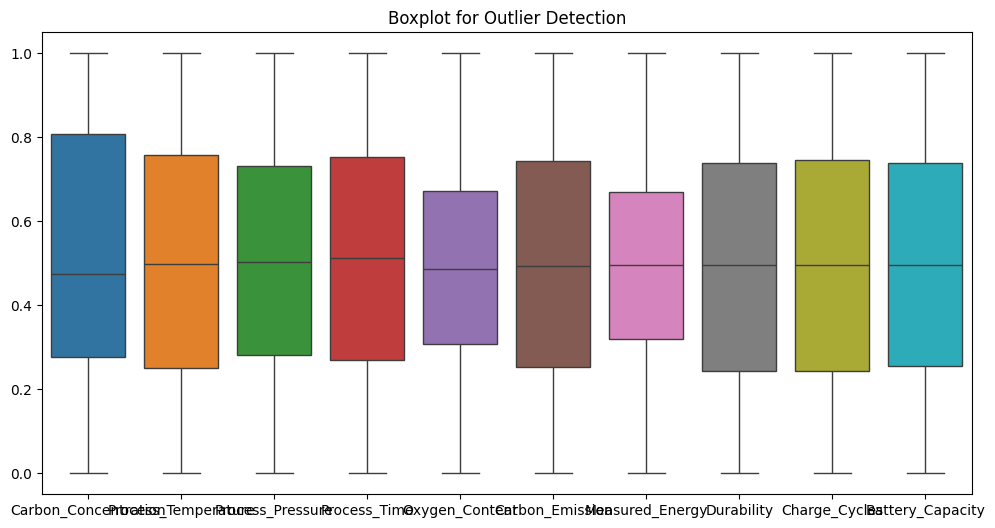

In [ ]:
# Check the actual column names
print(df.columns)

# Update the numerical_cols list with the correct name
numerical_cols = ['Carbon_Concentration', 'Process_Temperature', 'Process_Pressure',
                  'Process_Time', 'Oxygen_Content', 'Carbon_Emission',
                  'Measured_Energy', 'Durability', 'Charge_Cycles',  # Updated
                  'Battery_Capacity']

# Normalize the numerical features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check for outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot for Outlier Detection')
plt.show()


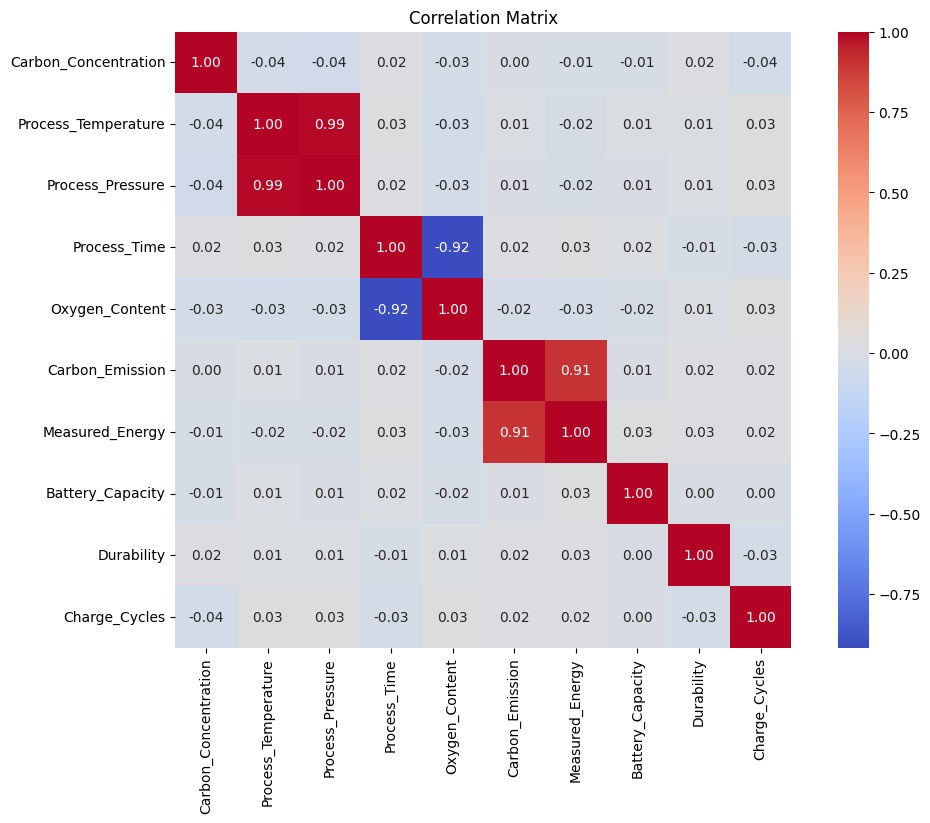

In [ ]:
# Step 1: Calculate the correlation matrix for numeric columns only
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df['Temperature_Pressure_Ratio'] = df['Process_Temperature'] / (df['Process_Pressure'] + 1)  # Adding the temperature-to-pressure ratio


In [ ]:
# Separate features and target after modification
X = df.drop(columns=['Time', 'Battery_Capacity'])
y = df['Battery_Capacity'].values

# One-hot encoding for categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[['Carbon_Material_Type']])

# Combine with numeric features
X_final = np.hstack((X_encoded, X.drop(columns=['Carbon_Material_Type']).values))

# Convert data to 3D format for RNN
def create_sequences(X, y, time_steps=10):
    sequences = []
    targets = []
    for i in range(len(X) - time_steps):
        seq_x = X[i:i + time_steps]
        seq_y = y[i + time_steps]
        sequences.append(seq_x)
        targets.append(seq_y)
    return np.array(sequences), np.array(targets)

X_sequences, y_sequences = create_sequences(X_final, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

print('Shape of training data:', X_train.shape)
print('Shape of test data:', X_test.shape)


Shape of training data: (1592, 10, 13)
Shape of test data: (398, 10, 13)


In [ ]:
# Building the RNN model
model = keras.Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# View model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,251 (12.70 KB)

 Trainable params: 3,251 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3562 - val_loss: 0.1050
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1040 - val_loss: 0.0924
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0888 - val_loss: 0.0938
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0846 - val_loss: 0.0912
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0802 - val_loss: 0.0949
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0784 - val_loss: 0.0875
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0782 - val_loss: 0.0891
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0768 - val_loss: 0.0906
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0703 - val_loss: 0.0926
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0672 - val_loss: 0.0922
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0674 - val_loss: 0.0926
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - val_loss: 0.2657 - val_mean_absolute_error: 0.2657
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - val_loss: 0.2613 - val_mean_absolute_error: 0.2613
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - val_loss: 0.2610 - val_mean_absolute_error: 0.2610
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - val_loss: 0.2602 - val_mean_absolute_error: 0.2602
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - val_loss: 0.2638 - val_mean_absolute_error: 0.2638
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - val_loss: 0.2605 - val_mean_absolute_error: 0.2605
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - val_loss: 0.26

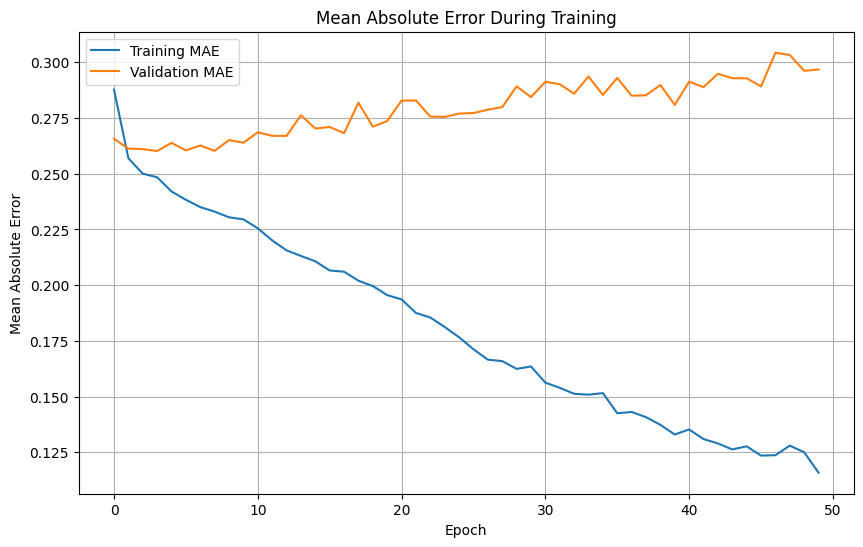

Test Loss (MAE): 0.2967647314071655, Test MAE: 0.2967647314071655


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# (Assuming you've already created your DataFrame `df` and performed encoding)

# Create sequences
def create_sequences(X, y, time_steps=10):
    sequences = []
    targets = []
    for i in range(len(X) - time_steps):
        seq_x = X[i:i + time_steps]
        seq_y = y[i + time_steps]
        sequences.append(seq_x)
        targets.append(seq_y)
    return np.array(sequences), np.array(targets)

X_sequences, y_sequences = create_sequences(X_final, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the RNN model
model = keras.Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(1))  # Output layer

# Compile the model with MAE as a metric
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Fit the model and store training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)

# Step 2: Plot Mean Absolute Error (MAE) during training
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid()
plt.show()

# Print test loss and MAE
print(f'Test Loss (MAE): {test_loss}, Test MAE: {test_mae}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


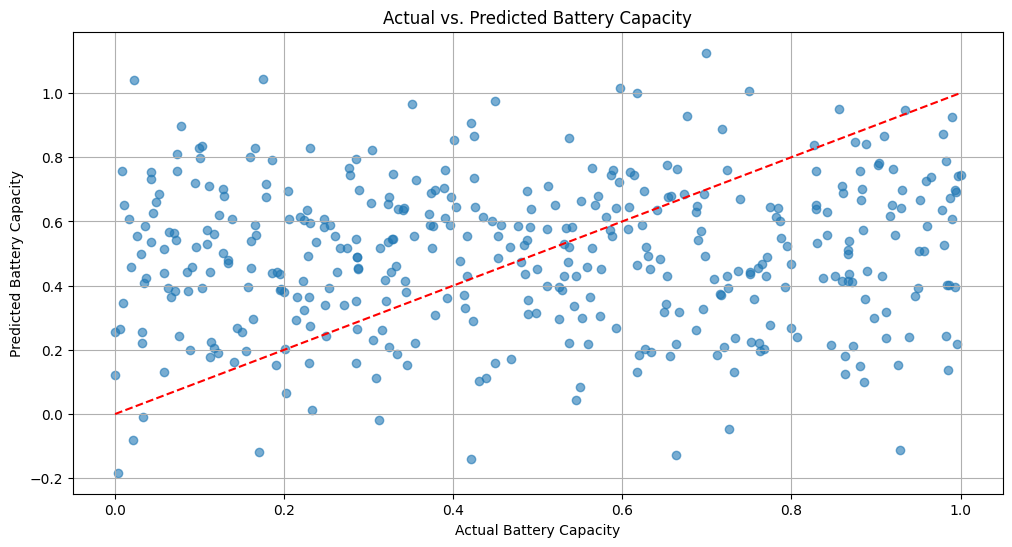

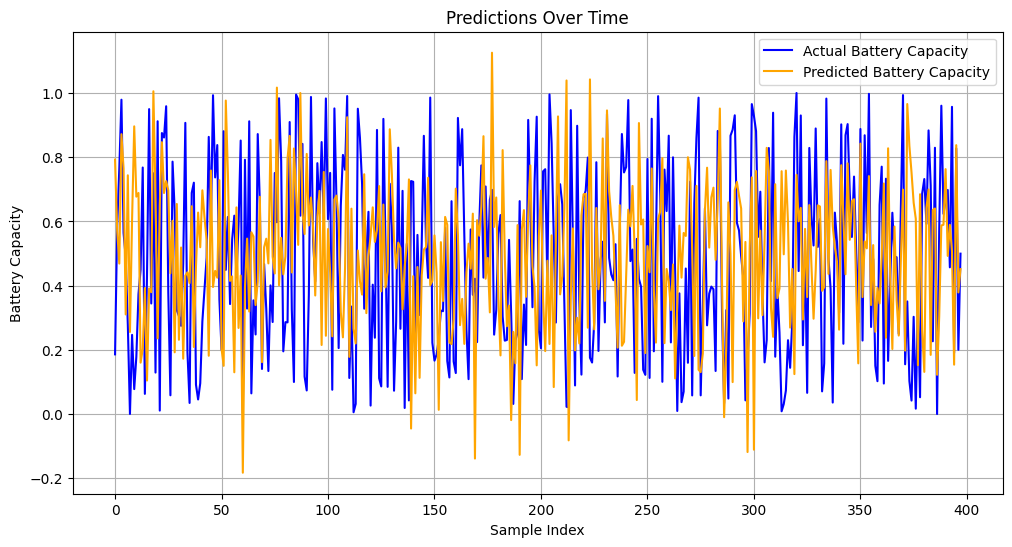

In [ ]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Step 1: Scatter Plot of Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs. Predicted Battery Capacity')
plt.xlabel('Actual Battery Capacity')
plt.ylabel('Predicted Battery Capacity')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.grid()
plt.show()

# Step 2: Line Plot of Predictions Over Time
# Assuming y_test and y_pred are in the same order as the original data
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Battery Capacity', color='blue')
plt.plot(y_pred, label='Predicted Battery Capacity', color='orange')
plt.title('Predictions Over Time')
plt.xlabel('Sample Index')
plt.ylabel('Battery Capacity')
plt.legend()
plt.grid()
plt.show()


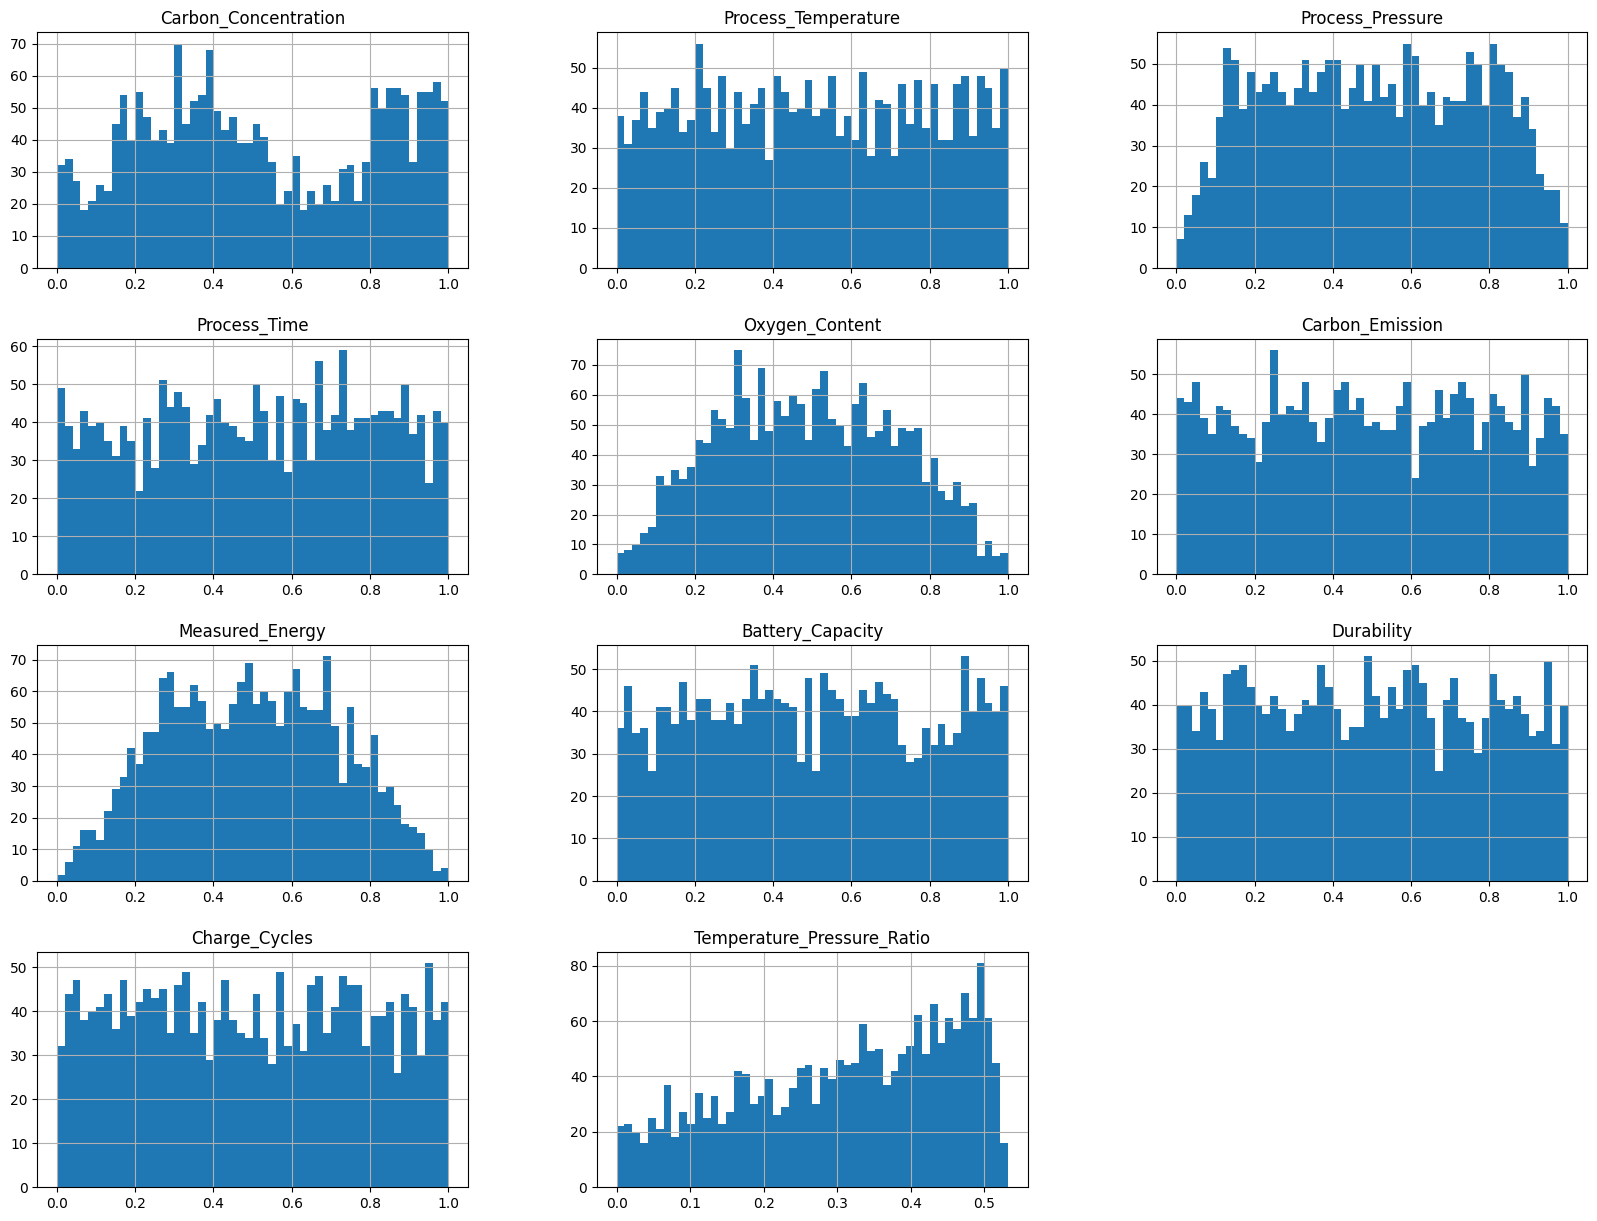

In [ ]:
# Creating a histogram for each numerical feature in the dataset
# Replace 'df' with the actual name of your DataFrame
df.hist(bins=50, figsize=(20, 15))  # Draw histograms with 50 bins and figure size 20x15 inches
plt.show()

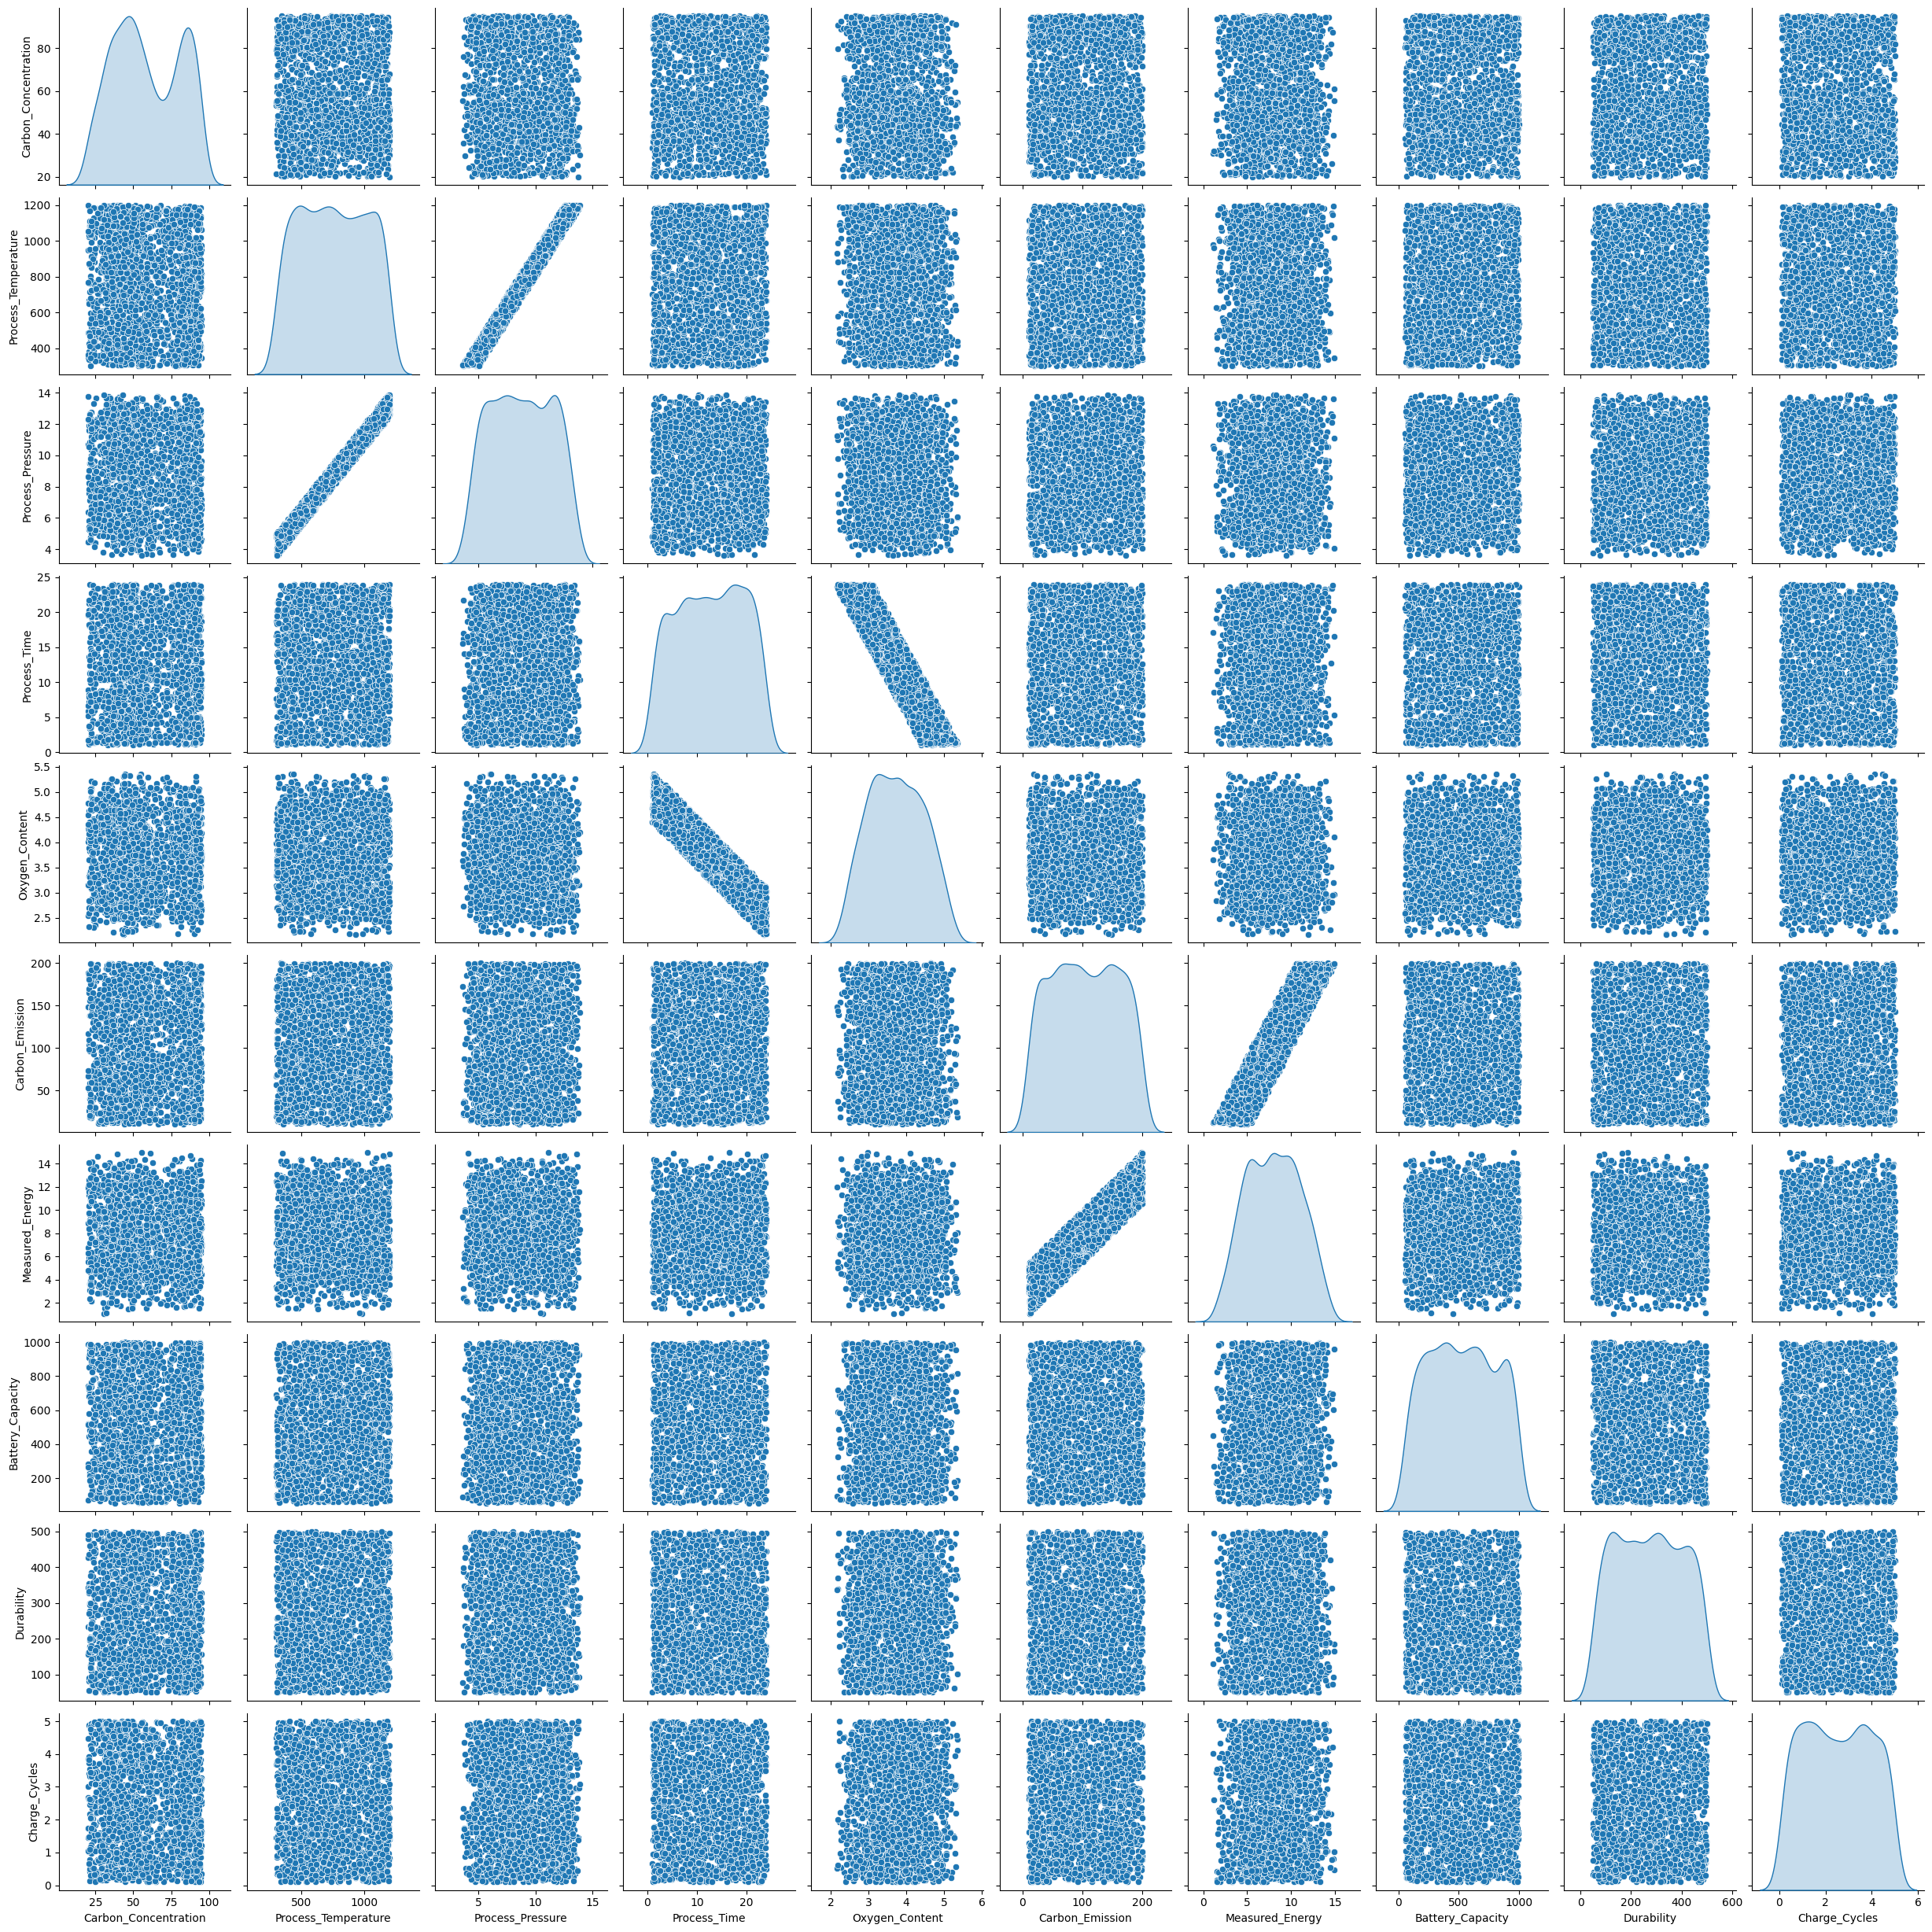

In [ ]:
# Assuming your data is in a CSV file named 'battery_data.csv'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into the data_battery DataFrame
data_battery = pd.read_csv('updated_carbon_material_dataset.csv')

# Observing the relationships between numerical features using pairplot
sns.pairplot(data_battery, diag_kind='kde')  # Create a pair plot with KDE on the diagonal
plt.show()  # Display the pair plot


Data read successfully!
DataFrame Dimensions: (2000, 12)
         Time Carbon_Material_Type  Carbon_Concentration  Process_Temperature  \
0  2019-01-01              Biochar             25.553988                 1182   
1  2019-01-02         Carbon Black             46.257028                  612   
2  2019-01-03             Graphene             93.094188                 1139   
3  2019-01-04              Biochar             41.966747                  818   
4  2019-01-05              Biochar             44.196834                  505   

   Process_Pressure  Process_Time  Oxygen_Content  Carbon_Emission  \
0         13.661398           1.6            4.65           178.76   
1          7.587354          10.3            4.25           172.40   
2         12.322377          23.9            2.48           170.57   
3          9.128174           5.0            4.24           101.25   
4          6.886800          16.5            3.52            43.71   

   Measured_Energy  Battery_Capacit

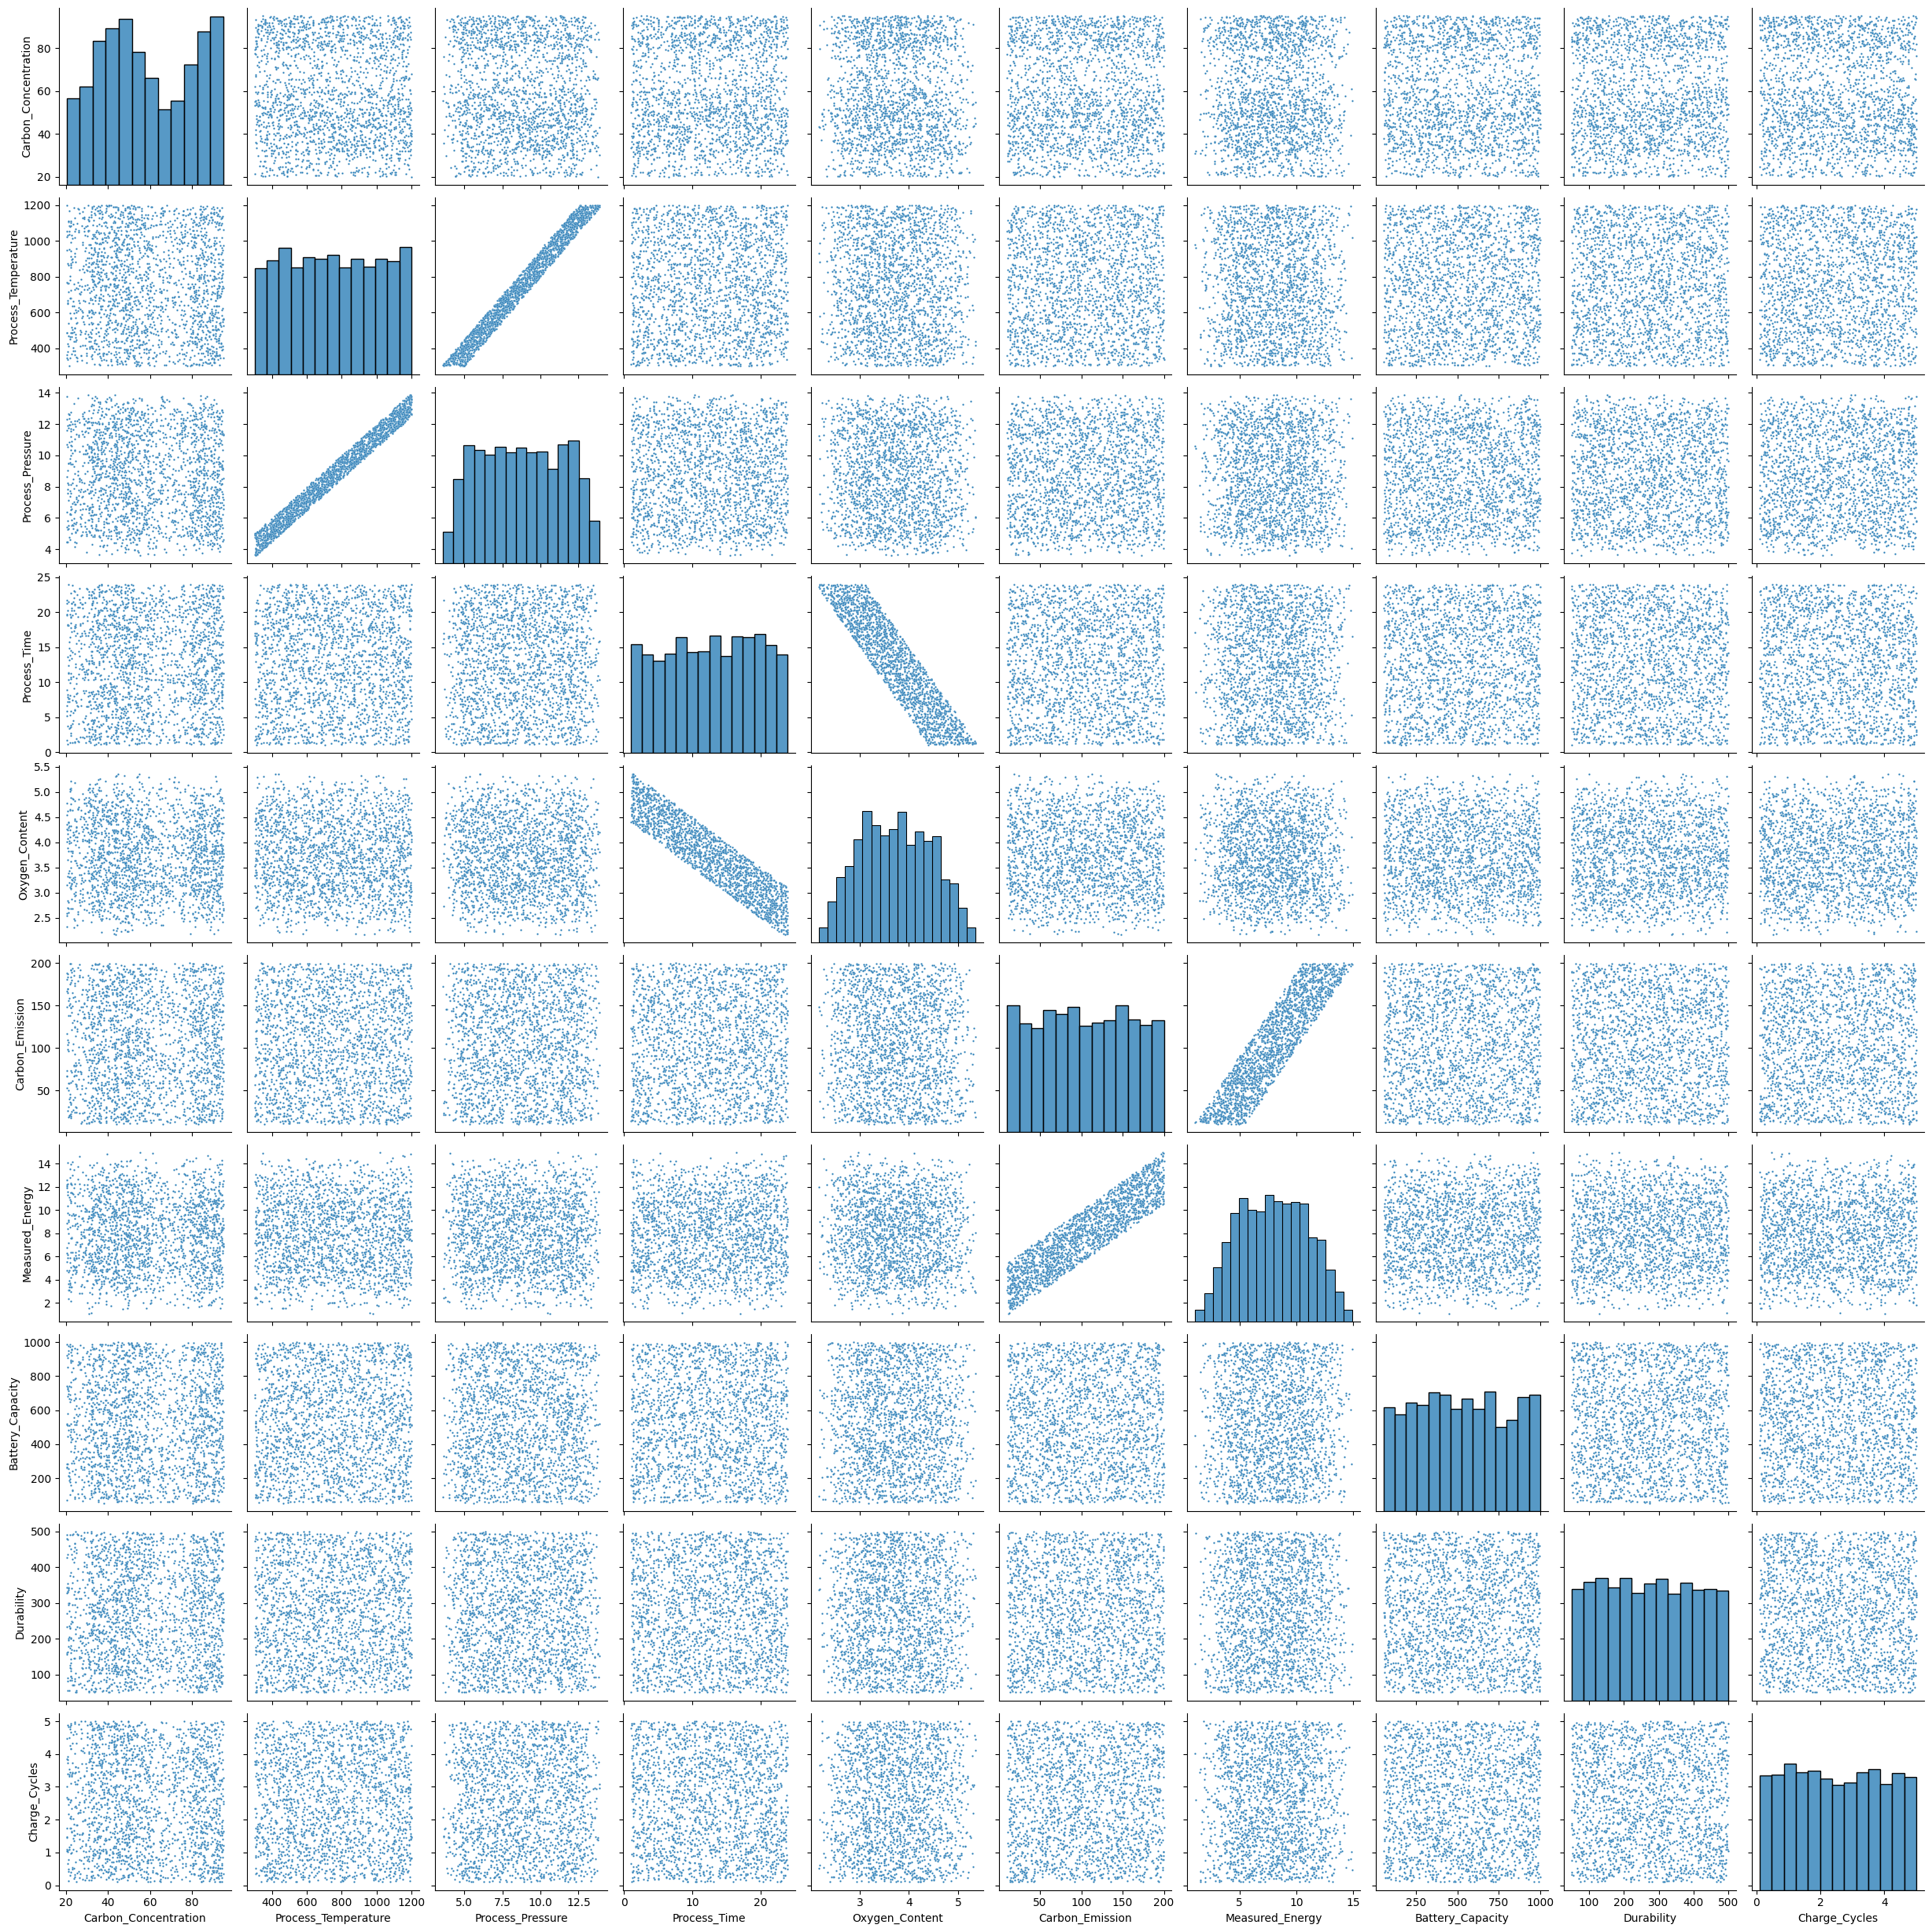

      Carbon_Concentration  Process_Temperature  Process_Pressure  \
1137              0.588450            -0.841801         -0.849273   
1646             -0.475039            -0.314042         -0.452088   
301               1.599653             1.411768          1.218972   
266              -0.792115             1.207598          0.939374   
1169             -1.342219            -1.381117         -1.323846   

      Process_Time  Oxygen_Content  Measured_Energy  Battery_Capacity  \
1137      0.068434        0.534395         0.856382          0.120324   
1646      0.341294       -0.939935         1.465470          1.496522   
301      -0.265061       -0.016757         0.721394          1.702437   
266      -1.098800        1.374900        -1.491077          0.364703   
1169      1.629799       -1.491086         0.632501          0.813240   

      Durability  Charge_Cycles  
1137   -0.828412       0.255171  
1646    1.646320       0.093021  
301    -1.161303      -0.626079  
266     0.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Membaca dataset dari file CSV
url = 'https://drive.google.com/uc?id=167PytDdSlq0ZOFGpZkRtw5CpQJ9pWev0'
data_baterai = pd.read_csv(url)

# Menampilkan dimensi dan beberapa baris awal dari DataFrame
print("Data read successfully!")
print(f"DataFrame Dimensions: {data_baterai.shape}")
print(data_baterai.head())

# Menggunakan pairplot untuk memvisualisasikan hubungan antar fitur numerik
sns.pairplot(data_baterai[['Carbon_Concentration', 'Process_Temperature', 'Process_Pressure',
                            'Process_Time', 'Oxygen_Content', 'Carbon_Emission',
                            'Measured_Energy', 'Battery_Capacity', 'Durability', 'Charge_Cycles']],
             plot_kws={"s": 3})
plt.show()

# Memisahkan fitur dan target variabel
X = data_baterai.drop(["Carbon_Emission"], axis=1)  # Semua fitur kecuali 'Carbon_Emission'
y = data_baterai["Carbon_Emission"]  # Target variabel adalah 'Carbon_Emission'

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

# Daftar fitur numerik yang akan distandarisasi
numerical_features = ['Carbon_Concentration', 'Process_Temperature', 'Process_Pressure',
                     'Process_Time', 'Oxygen_Content', 'Measured_Energy',
                     'Battery_Capacity', 'Durability', 'Charge_Cycles']

# Membuat objek StandardScaler untuk standarisasi
scaler = StandardScaler()

# Menghitung parameter skala dari data pelatihan
scaler.fit(X_train[numerical_features])

# Menerapkan transformasi standarisasi pada data pelatihan
X_train[numerical_features] = scaler.transform(X_train[numerical_features])

# Menampilkan beberapa baris pertama dari data yang telah distandarisasi
print(X_train[numerical_features].head())

# Inisialisasi PCA untuk mereduksi data menjadi 3 komponen utama
pca = PCA(n_components=3, random_state=123)

# Melatih model PCA pada fitur yang relevan
pca.fit(data_baterai[['Carbon_Concentration', 'Process_Temperature', 'Process_Pressure',
                       'Process_Time', 'Oxygen_Content', 'Carbon_Emission',
                       'Measured_Energy', 'Battery_Capacity', 'Durability', 'Charge_Cycles']])

# Mengubah data untuk mendapatkan komponen utama
princ_comp = pca.transform(data_baterai[['Carbon_Concentration', 'Process_Temperature', 'Process_Pressure',
                                           'Process_Time', 'Oxygen_Content', 'Carbon_Emission',
                                           'Measured_Energy', 'Battery_Capacity', 'Durability', 'Charge_Cycles']])

# Menambahkan hasil transformasi sebagai kolom baru
data_baterai['PC1'] = princ_comp[:, 0]  # Komponen utama pertama
data_baterai['PC2'] = princ_comp[:, 1]  # Komponen utama kedua
data_baterai['PC3'] = princ_comp[:, 2]  # Komponen utama ketiga

# Menghapus kolom asli setelah transformasi
data_baterai.drop(['Carbon_Concentration', 'Process_Temperature', 'Process_Pressure',
                   'Process_Time', 'Oxygen_Content', 'Carbon_Emission',
                   'Measured_Energy', 'Battery_Capacity', 'Durability', 'Charge_Cycles'],
                  axis=1, inplace=True)

# Tampilkan hasil akhir
print(data_baterai.head())

In [ ]:
# Memisahkan fitur dan target variabel
X = data_baterai.drop(["Carbon_Emission"], axis=1)  # Semua fitur kecuali 'Carbon_Emission'
y = data_baterai["Carbon_Emission"]  # Target variabel adalah 'Carbon_Emission'

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
# Menampilkan jumlah sampel dalam dataset
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 2000
Total # of sample in train dataset: 1800
Total # of sample in test dataset: 200


In [ ]:
# Menampilkan deskripsi statistik dari fitur numerik pada dataset pelatihan
X_train[numerical_features].describe().round(4)

Carbon_Concentration  Process_Temperature  Process_Pressure  \
count             1800.0000            1800.0000         1800.0000   
mean                -0.0000               0.0000           -0.0000   
std                  1.0003               1.0003            1.0003   
min                 -1.7841              -1.7548           -1.9520   
25%                 -0.8223              -0.8611           -0.8497   
50%                 -0.1417              -0.0270           -0.0141   
75%                  1.0018               0.8725            0.8796   
max                  1.6409               1.7084            1.9227   

       Process_Time  Oxygen_Content  Measured_Energy  Battery_Capacity  \
count     1800.0000       1800.0000        1800.0000         1800.0000   
mean        -0.0000         -0.0000          -0.0000            0.0000   
std          1.0003          1.0003           1.0003            1.0003   
min         -1.7658         -2.1525          -2.2648           -1.7460   
25%         -0.8411         -0.8021          -0.8128           -0.8560   
50%          0.0230         -0.0168          -0.0161           -0.0223   
75%          0.8415          0.8100           0.7872            0.8262   
max          1.7208          2.2430           2.2853            1.7221   

       Durability  Charge_Cycles  
count   1800.0000      1800.0000  
mean       0.0000        -0.0000  
std        1.0003         1.0003  
min       -1.7313        -1.7188  
25%       -0.8818        -0.8799  
50%        0.0025         0.0084  
75%        0.8621         0.8544  
max        1.7426         1.7357

In [ ]:
# Siapkan DataFrame untuk analisis performa model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'svm'])


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Membaca dataset dari file CSV
url = 'https://drive.google.com/uc?id=167PytDdSlq0ZOFGpZkRtw5CpQJ9pWev0'
data_baterai = pd.read_csv(url)

# Menampilkan nama kolom dalam DataFrame
print("Nama kolom dalam DataFrame:")
print(data_baterai.columns)

# Memisahkan fitur dan target variabel
X = data_baterai.drop(["Carbon_Emission"], axis=1)  # Semua fitur kecuali 'Carbon_Emission'
y = data_baterai["Carbon_Emission"]  # Target variabel adalah 'Carbon_Emission'

# --- Changes start here ---
# Define categorical and numerical features
categorical_features = ['Carbon_Material_Type', 'Time']  # Perbarui nama kolom di sini
numerical_features = ['Carbon_Concentration', 'Process_Temperature', 'Process_Pressure',
                     'Process_Time', 'Oxygen_Content', 'Measured_Energy',
                     'Battery_Capacity', 'Durability', 'Charge_Cycles']

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Apply preprocessing to X
X = preprocessor.fit_transform(X)
# --- Changes end here ---

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

# Melatih model KNN dengan data pelatihan
# knn.fit(X_train, y_train)  # Pastikan Anda sudah mendefinisikan model KNN sebelumnya

# ... (rest of your code remains the same)

Nama kolom dalam DataFrame:
Index(['Time', 'Carbon_Material_Type', 'Carbon_Concentration',
       'Process_Temperature', 'Process_Pressure', 'Process_Time',
       'Oxygen_Content', 'Carbon_Emission', 'Measured_Energy',
       'Battery_Capacity', 'Durability', 'Charge_Cycles'],
      dtype='object')


In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# Membuat model prediksi Random Forest dengan 50 estimators dan kedalaman maksimum 16
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)

# Melatih model Random Forest dengan data pelatihan
RF.fit(X_train, y_train)

# Menghitung Mean Squared Error (MSE) untuk data pelatihan dan menyimpannya di DataFrame
models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Membuat model prediksi Boosting dengan learning rate 0.05
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)

# Melatih model Boosting dengan data pelatihan
boosting.fit(X_train, y_train)

# Menghitung Mean Squared Error (MSE) untuk data pelatihan dan menyimpannya di DataFrame
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Membuat model Support Vector Regression (SVR)
svm = SVR()

# Melatih model SVR dengan data pelatihan
svm.fit(X_train, y_train)

# Menghitung Mean Squared Error (MSE) untuk data pelatihan dan menyimpannya di DataFrame
models.loc['train_mse', 'svm'] = mean_squared_error(y_pred=svm.predict(X_train), y_true=y_train)


In [ ]:
# Get the indices of numerical features from the original DataFrame
numerical_features_indices = [data_baterai.columns.get_loc(feature) for feature in numerical_features]

# Transform only the numerical features in X_test using their indices
X_test[:, numerical_features_indices] = scaler.transform(X_test[:, numerical_features_indices])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Membuat variabel mse yang berisi DataFrame nilai MSE untuk data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting', 'svm'])

# Membuat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'svm': svm}

# Pastikan semua model telah difit
for model in model_dict.values():
    if not hasattr(model, "n_samples_fit_"):  # Check if model has been fitted
        model.fit(X_train, y_train) # Fit the model if it hasn't been fitted yet

# Menghitung Mean Squared Error (MSE) untuk masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3

# Menampilkan DataFrame mse
mse

train      test
KNN       0.662434  4.033178
RF        0.096773  9.011105
Boosting  0.497265  8.975355
svm       0.990902  2.851698

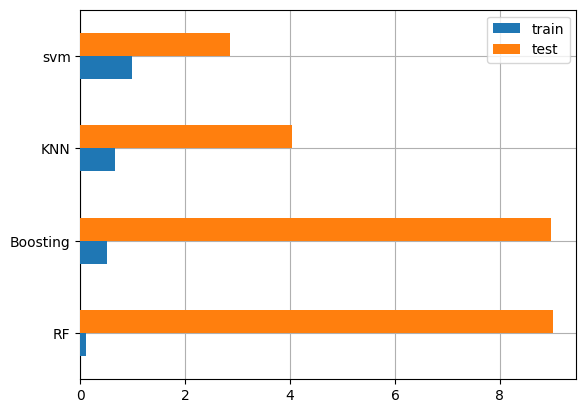

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Assuming knn, RF, boosting, svm are defined and fitted already

# Membuat variabel mse yang berisi DataFrame nilai MSE untuk data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting', 'svm'])

# Membuat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting, 'svm': svm}

# Menghitung Mean Squared Error (MSE) untuk masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3

# Menampilkan DataFrame mse
#mse


# Membuat grafik batang horizontal untuk membandingkan nilai MSE pada data test
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
# Mengambil satu contoh dari data test untuk melakukan prediksi
prediksi = X_test[0:1]  # Menggunakan slicing array NumPy
pred_dict = {'y_true': y_test[:1]}

# Melakukan prediksi menggunakan masing-masing model dan menyimpan hasilnya dalam dictionary
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

# Menampilkan hasil prediksi dalam bentuk DataFrame
pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting  prediksi_svm
1342  189.21          62.9         29.5               26.0         103.5

Data read successfully!
DataFrame Dimensions: (2000, 12)
         Time Carbon_Material_Type  Carbon_Concentration  Process_Temperature  \
0  2019-01-01              Biochar             25.553988                 1182   
1  2019-01-02         Carbon Black             46.257028                  612   
2  2019-01-03             Graphene             93.094188                 1139   
3  2019-01-04              Biochar             41.966747                  818   
4  2019-01-05              Biochar             44.196834                  505   

   Process_Pressure  Process_Time  Oxygen_Content  Carbon_Emission  \
0         13.661398           1.6            4.65           178.76   
1          7.587354          10.3            4.25           172.40   
2         12.322377          23.9            2.48           170.57   
3          9.128174           5.0            4.24           101.25   
4          6.886800          16.5            3.52            43.71   

   Measured_Energy  Battery_Capacit

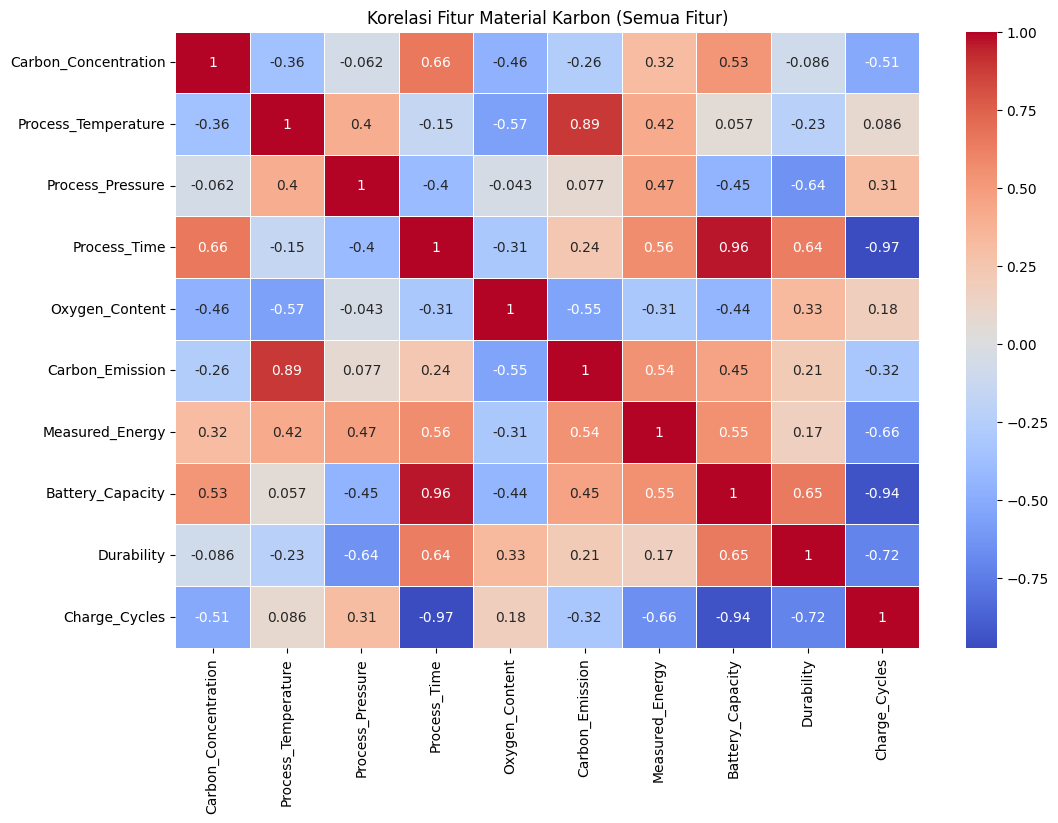


=== Saran atau Solusi untuk Meningkatkan Kinerja Baterai ===
- Kandungan oksigen rendah dapat mengurangi efisiensi. Solusi: Pertimbangkan untuk meningkatkan kandungan oksigen dalam proses.
- Emisi karbon tinggi dapat berdampak negatif. Solusi: Implementasikan teknologi untuk mengurangi emisi selama proses.
- Kapasitas baterai rendah dapat membatasi aplikasi. Solusi: Eksplorasi material baru untuk meningkatkan kapasitas baterai.


<ipython-input-45-fa201d7dacc7>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=content_recommendations, x='Carbon_Material_Type', palette='Set2') # Changed column name to 'Carbon_Material_Type'


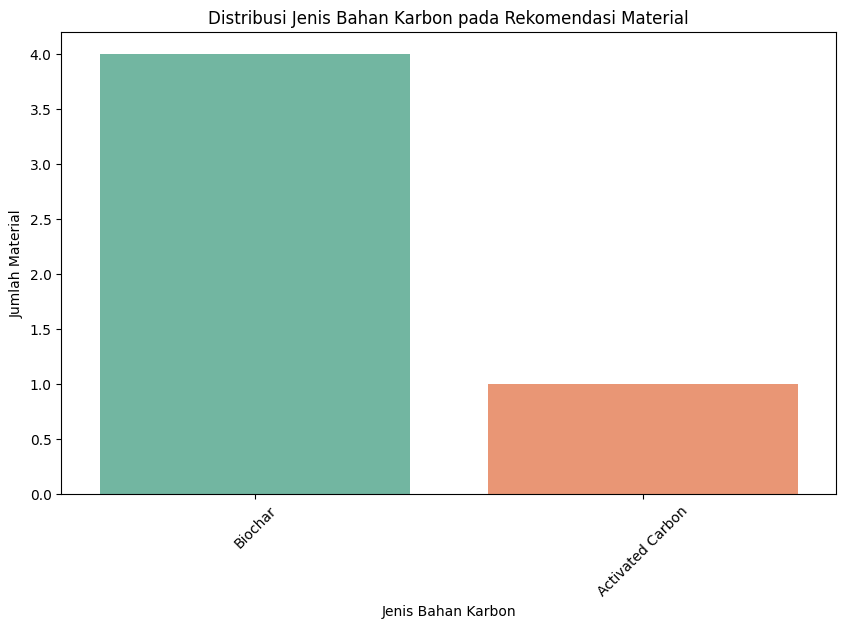

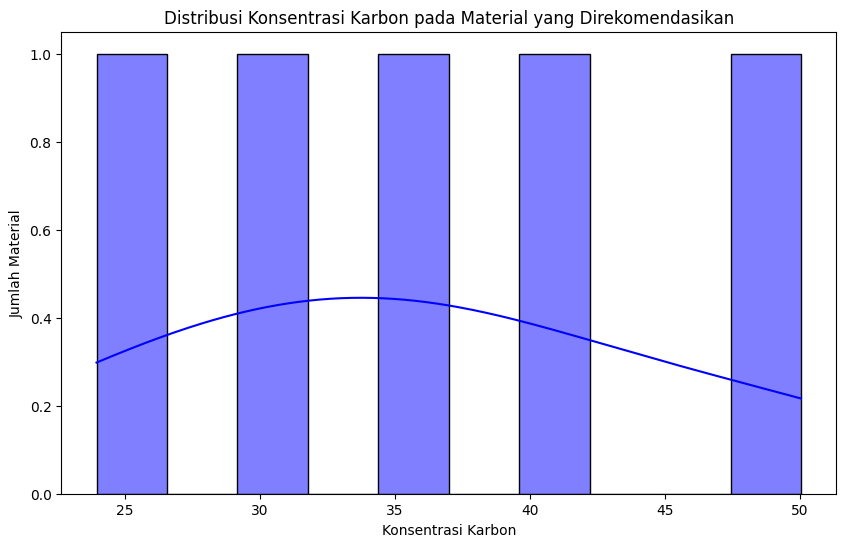

<ipython-input-45-fa201d7dacc7>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Carbon_Material_Type', data=risk_factors, palette='Set3')


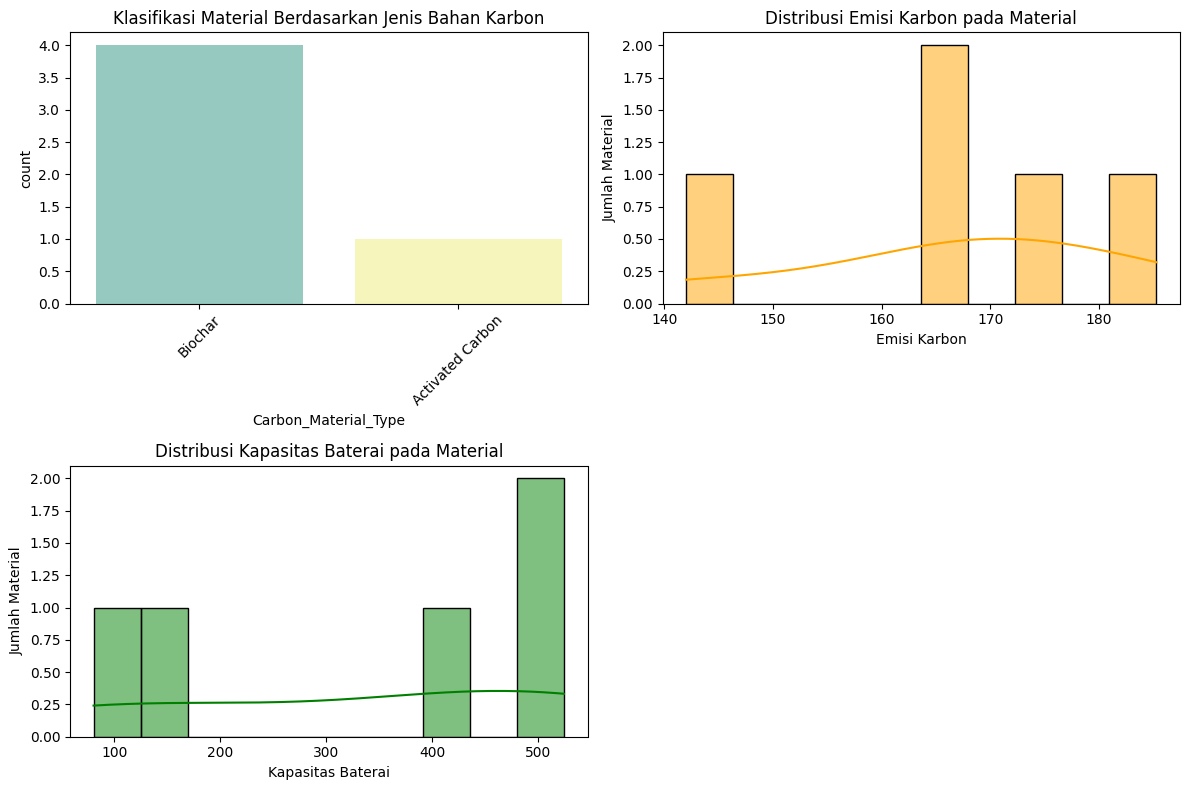

In [ ]:
# @title Content-Based Filtering for Carbon Materials and Battery Technology
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import requests

# Download the dataset
url = "https://drive.google.com/uc?id=167PytDdSlq0ZOFGpZkRtw5CpQJ9pWev0"
response = requests.get(url)
with open('/content/updated_carbon_material_dataset.csv', 'wb') as file:
    file.write(response.content)

# Load the dataset
data_carbon = pd.read_csv('/content/updated_carbon_material_dataset.csv')
print("Data read successfully!")
print("DataFrame Dimensions:", data_carbon.shape)
print(data_carbon.head())

# Fitur yang akan digunakan dalam Content-Based Filtering
content_features = [
    'Carbon_Concentration', 'Process_Temperature',
    'Process_Pressure', 'Process_Time', 'Oxygen_Content', 'Carbon_Emission',
    'Measured_Energy', 'Battery_Capacity', 'Durability', 'Charge_Cycles'
]

# Standarisasi fitur untuk skala yang lebih konsisten
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_carbon[content_features])

# Hitung matriks similarity menggunakan cosine similarity
content_similarity = cosine_similarity(scaled_data)

# Fungsi untuk mendapatkan rekomendasi berbasis konten
def get_content_based_recommendations(material_index, top_n=5):
    # Dapatkan similarity scores untuk material tertentu
    material_similarities = content_similarity[material_index]

    # Urutkan material berdasarkan similarity dan ambil yang teratas
    similar_materials = np.argsort(-material_similarities)[1:top_n+1]

    # Dapatkan rekomendasi material serupa
    recommendations = data_carbon.iloc[similar_materials]

    return recommendations

# Contoh penggunaan
material_index = 0  # Indeks material yang ingin dianalisis
content_recommendations = get_content_based_recommendations(material_index)

# Menampilkan rekomendasi dalam bentuk tabel menggunakan pandas DataFrame
print("\n=== Rekomendasi Material Karbon dengan Karakteristik Serupa (Content-Based Filtering) ===")
recommendations_df = pd.DataFrame(content_recommendations[['Carbon_Material_Type', 'Carbon_Concentration',
                               'Process_Temperature', 'Process_Pressure', 'Process_Time',
                               'Oxygen_Content', 'Carbon_Emission', 'Measured_Energy',
                               'Battery_Capacity', 'Durability', 'Charge_Cycles']])
print(recommendations_df)

# ================================================================
# Analisis Faktor Penyebab & Saran Terbaik dalam Bentuk Tabel
# ================================================================

def analyze_factors_and_solutions(data):
    # Analisis fitur-fitur yang berhubungan erat dengan material karbon
    risk_factors = data[content_features]

    # Menampilkan faktor-faktor risiko material dalam bentuk tabel menggunakan pandas DataFrame
    print("\n=== Faktor Material Terkait Emisi Karbon dan Kinerja Baterai (Tabel Statistik) ===")
    factors_df = risk_factors.describe().transpose()  # Transpose agar lebih mudah dibaca
    print(factors_df)

    # Visualisasi tabel sebagai heatmap untuk semua fitur
    plt.figure(figsize=(12, 8))
    sns.heatmap(risk_factors.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Korelasi Fitur Material Karbon (Semua Fitur)")
    plt.show()

    # Memberikan saran atau solusi berdasarkan analisis fitur-fitur risiko
    print("\n=== Saran atau Solusi untuk Meningkatkan Kinerja Baterai ===")

    if data['Carbon_Concentration'].mean() > 50:
        print("- Konsentrasi karbon tinggi dapat berpengaruh pada emisi. Solusi: Optimalkan proses untuk mengurangi konsentrasi karbon.")

    if data['Oxygen_Content'].mean() < 10:
        print("- Kandungan oksigen rendah dapat mengurangi efisiensi. Solusi: Pertimbangkan untuk meningkatkan kandungan oksigen dalam proses.")

    if data['Carbon_Emission'].mean() > 100:
        print("- Emisi karbon tinggi dapat berdampak negatif. Solusi: Implementasikan teknologi untuk mengurangi emisi selama proses.")

    if data['Battery_Capacity'].mean() < 2000:
        print("- Kapasitas baterai rendah dapat membatasi aplikasi. Solusi: Eksplorasi material baru untuk meningkatkan kapasitas baterai.")

# Analisis faktor penyebab dan solusi untuk material dengan karakteristik serupa
analyze_factors_and_solutions(content_recommendations)

# ================================================================
# Visualisasi Distribusi Material Berdasarkan Faktor Risiko
# ================================================================

# Visualisasi distribusi material serupa berdasarkan jenis bahan karbon
plt.figure(figsize=(10, 6))
sns.countplot(data=content_recommendations, x='Carbon_Material_Type', palette='Set2') # Changed column name to 'Carbon_Material_Type'
plt.title('Distribusi Jenis Bahan Karbon pada Rekomendasi Material')
plt.xlabel('Jenis Bahan Karbon')
plt.ylabel('Jumlah Material')
plt.xticks(rotation=45)
plt.show()

# Visualisasi distribusi konsentrasi karbon pada material yang direkomendasikan
plt.figure(figsize=(10, 6))
sns.histplot(content_recommendations['Carbon_Concentration'], bins=10, kde=True, color='blue')
plt.title('Distribusi Konsentrasi Karbon pada Material yang Direkomendasikan')
plt.xlabel('Konsentrasi Karbon')
plt.ylabel('Jumlah Material')
plt.show()

# ================================================================
# Visualisasi Klasifikasi Material Berdasarkan Risiko Tertentu
# ================================================================

def visualize_classification(risk_factors):
    plt.figure(figsize=(12, 8))

    # Visualisasi jenis bahan karbon
    plt.subplot(2, 2, 1)
    # Changed 'Type_of_Material_Carbon' to 'Carbon_Material_Type'
    sns.countplot(x='Carbon_Material_Type', data=risk_factors, palette='Set3')
    plt.title("Klasifikasi Material Berdasarkan Jenis Bahan Karbon")
    plt.xticks(rotation=45)

    # Visualisasi emisi karbon
    plt.subplot(2, 2, 2)
    sns.histplot(data=risk_factors, x='Carbon_Emission', bins=10, kde=True, color='orange')
    plt.title("Distribusi Emisi Karbon pada Material")
    plt.xlabel("Emisi Karbon")
    plt.ylabel("Jumlah Material")

    # Visualisasi kapasitas baterai
    plt.subplot(2, 2, 3)
    sns.histplot(data=risk_factors, x='Battery_Capacity', bins=10, kde=True, color='green')
    plt.title("Distribusi Kapasitas Baterai pada Material")
    plt.xlabel("Kapasitas Baterai")
    plt.ylabel("Jumlah Material")

    plt.tight_layout()
    plt.show()

# Visualisasi klasifikasi material yang direkomendasikan
visualize_classification(content_recommendations)